In [2]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN

from utils.visualize import plot_clusters

In [3]:
df = pd.read_csv("../data/candy-data.csv")

### Preprocess

In [4]:
num_cols = ["sugarpercent", "pricepercent"]
cat_cols = [
    "chocolate",
    "fruity",
    "caramel",
    "peanutyalmondy",
    "nougat",
    "crispedricewafer",
    "hard",
    "bar",
    "pluribus",
]


In [5]:
preprocessor = ColumnTransformer(
    [("num", StandardScaler(), num_cols), ("bin", "passthrough", cat_cols)]
)

In [6]:
X_preprocessed = preprocessor.fit_transform(df[num_cols + cat_cols])

## Clustering

### K-means

In [7]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_preprocessed)

df["kmeans_cluster"] = kmeans_labels

### DBSCAN

In [8]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_preprocessed)

print(
    f"Number of HDBSCAN clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}"
)
print(f"Number of noise points: {list(dbscan_labels).count(-1)}")

df["dbscan_cluster"] = dbscan_labels

Number of HDBSCAN clusters: 4
Number of noise points: 22


### HDBSCAN

In [9]:
hdbscan = HDBSCAN(min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.5)
hdbscan_labels = hdbscan.fit_predict(X_preprocessed)

print(
    f"Number of HDBSCAN clusters: {len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)}"
)
print(f"Number of noise points: {list(hdbscan_labels).count(-1)}")

df["hdbscan_cluster"] = hdbscan_labels

Number of HDBSCAN clusters: 5
Number of noise points: 49


## Visualize / interpret clusters

### Apply umap

In [10]:
reducer = umap.UMAP(random_state=42)
X_2d = reducer.fit_transform(X_preprocessed)

c:\Users\aronn\repos\lidl-case-study\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### k-means clusters

In [11]:
df.groupby("kmeans_cluster")[["winpercent"] + num_cols + cat_cols].mean().round(2)

,winpercent,sugarpercent,pricepercent,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
kmeans_cluster,,,,,,,,,,,,
0,44.33,0.17,0.23,0.21,0.57,0.11,0.07,0.00,0.00,0.18,0.00,0.61
1,59.97,0.57,0.74,0.91,0.06,0.27,0.36,0.21,0.21,0.03,0.64,0.24
2,44.02,0.72,0.38,0.04,0.83,0.08,0.00,0.00,0.00,0.38,0.00,0.79


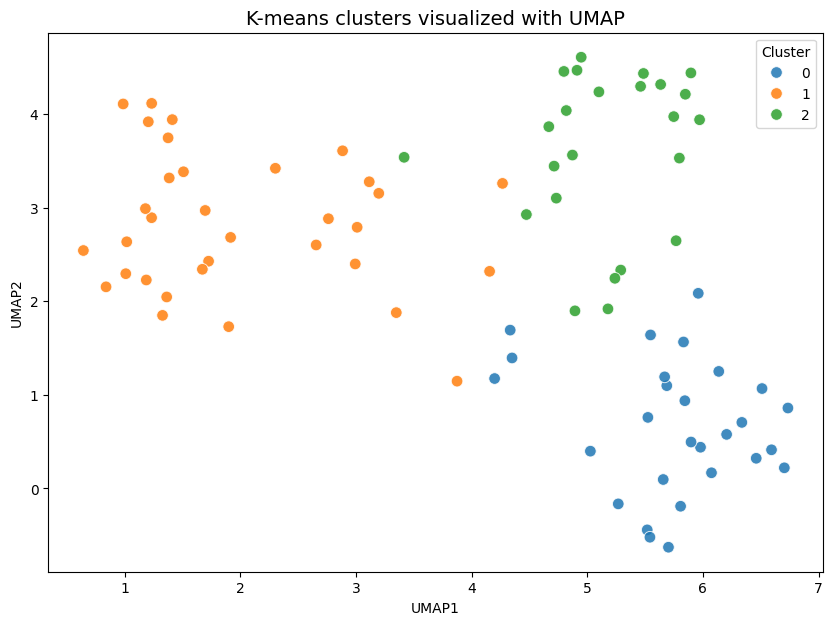

In [12]:
plot_clusters(X_2d, df["kmeans_cluster"], title="K-means clusters visualized with UMAP")